In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
%matplotlib inline
from pathlib import Path
import itertools

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from palmerpenguins import load_penguins

from matplottoy.data import iris
from matplottoy.encoders import color, position
from matplottoy.artists import point, bar, utils

spath = Path("../../../draft/figures/code/")

In [4]:
penguins = load_penguins()

In [5]:
dict(penguins.dtypes)

{'species': dtype('O'),
 'island': dtype('O'),
 'bill_length_mm': dtype('float64'),
 'bill_depth_mm': dtype('float64'),
 'flipper_length_mm': dtype('float64'),
 'body_mass_g': dtype('float64'),
 'sex': dtype('O'),
 'year': dtype('int64')}

In [6]:
penguins['species'].value_counts().reset_index()

,index,species
0,Adelie,152
1,Gentoo,124
2,Chinstrap,68


In [7]:
table = iris.DataFrame(penguins['species'].value_counts().reset_index())

In [8]:
table.view().keys()

Index(['index', 'species'], dtype='object')

In [9]:
fts = {'position':{'name':'index', 
                   'encoder': position.Nominal({'Adelie': 0,  'Chinstrap': 1, 'Gentoo': 2})},  
        'length': {'name': 'species'},
        'facecolors': {'name':'index', 
                       'encoder': color.Categorical({'Adelie':'#FF8C00',
                                                'Gentoo':'#159090',
                                                'Chinstrap':'#A034F0'})}}

In [10]:
table.view()['index']

0       Adelie
1       Gentoo
2    Chinstrap
Name: index, dtype: object

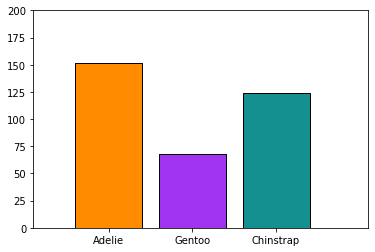

In [11]:
fig, ax = plt.subplots()

artistv = bar.Bar(table, fts, orientation='v')
ax.add_artist(artistv)
ax.set(xlim = (-0.5, 3.5), 
       ylim = (0,200),
       xticks = [.4, 1.4, 2.4],
       xticklabels = table.view(None)['index'])
fig.savefig(spath/"bar_v.png")

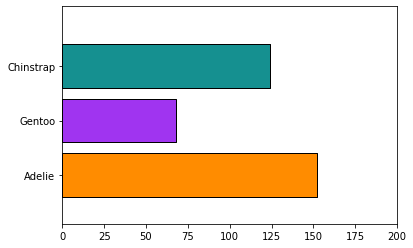

In [14]:
fig, ax = plt.subplots()

artisth = bar.Bar(table, fts, orientation='horizontal')
ax.add_artist(artisth)
ax.set(ylim = (-0.5, 3.5), 
       xlim = (0,200),
       yticks = [.4, 1.4, 2.4],
       yticklabels = table.view(None)['index'])
fig.savefig(spath/"bar_h.png")

# grouped bar

In [15]:
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


In [16]:
df = penguins.groupby(['island','species']).count()['sex'].reset_index()

In [17]:
tb = df.pivot(index=['island'], columns=['species'], values = 'sex').reset_index().fillna(0)

In [18]:
tb['Adelie_s'] = 'Adelie'
tb['Chinstrap_s'] = 'Chinstrap'
tb['Gentoo_s'] = 'Gentoo'

<AxesSubplot:>

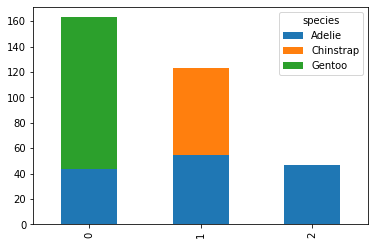

In [19]:
 df.pivot(index=['island'], columns=['species'], values = 'sex').reset_index().plot.bar(stacked=True)

<AxesSubplot:>

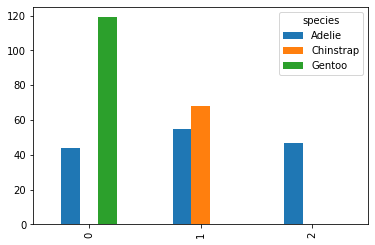

In [20]:
df.pivot(index=['island'], columns=['species'], values = 'sex').reset_index().plot.bar(stacked=False)

In [21]:
bt = iris.DataFrame(tb)

In [22]:
bt.view()

species,island,Adelie,Chinstrap,Gentoo,Adelie_s,Chinstrap_s,Gentoo_s
0,Biscoe,44.0,0.0,119.0,Adelie,Chinstrap,Gentoo
1,Dream,55.0,68.0,0.0,Adelie,Chinstrap,Gentoo
2,Torgersen,47.0,0.0,0.0,Adelie,Chinstrap,Gentoo


In [23]:
cmap = color.Categorical({'Adelie':'#FF8C00', 'Gentoo':'#159090','Chinstrap':'#A034F0'})
ts = {'position': {'name':'island',
                    'encoder': position.Nominal({'Biscoe':0.1, 'Dream':1.1, 'Torgersen':2.1})}} 
mgts = {'length': {'name': ['Adelie', 'Chinstrap', 'Gentoo']},
        'facecolors': {'name': ['Adelie_s', 'Chinstrap_s', 'Gentoo_s'], 
                       'encoder': cmap}} 
sgts = {'length':{'name': ['Adelie']},
        'facecolors' :{'name':['Adelie_s'], 'encoder':cmap}}

In [24]:
group_transforms =  [{'length': {'name':'Adelie'},
                      'facecolors': {'name':"Adelie_s", 'encoder':cmap}},
                     {'length': {'name':'Chinstrap'},
                      'facecolors': {'name':"Chinstrap_s", 'encoder':cmap}}, 
                     {'length': {'name':'Gentoo'},
                      'facecolors': {'name':"Gentoo_s", 'encoder':cmap}}]

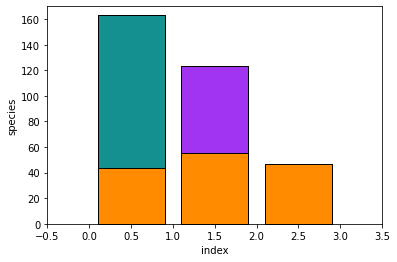

In [28]:
fig, ax = plt.subplots()
artistSB = bar.StackedBar(bt, ts, group_transforms)
ax.add_artist(artistSB)
_ = ax.set(ylim = (0, 170), 
       xlim = (-.5, 3.5),   
       xlabel = fts['position']['name'], 
       ylabel = fts['length']['name'], )
fig.savefig(spath/"bar_stacked.png")

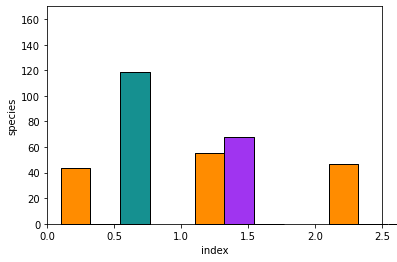

In [43]:
fig, ax = plt.subplots()
artistGB = bar.GroupedBar(bt, ts, group_transforms)
ax.add_artist(artistGB)
_ = ax.set(ylim = (0, 170), 
       xlim = (-0, 2.5),   
       xlabel = fts['position']['name'], 
       ylabel = fts['length']['name'], )
fig.savefig(spath/"bar_grouped.png")

In [27]:
ax.add_artist?

Signature: ax.add_artist(a)
Docstring:
Add an `~.Artist` to the axes, and return the artist.

Use `add_artist` only for artists for which there is no dedicated
"add" method; and if necessary, use a method such as `update_datalim`
to manually update the dataLim if the artist is to be included in
autoscaling.

If no ``transform`` has been specified when creating the artist (e.g.
``artist.get_transform() == None``) then the transform is set to
``ax.transData``.
File:      c:\users\story\anaconda3\envs\debug\lib\site-packages\matplotlib\axes\_base.py
Type:      method


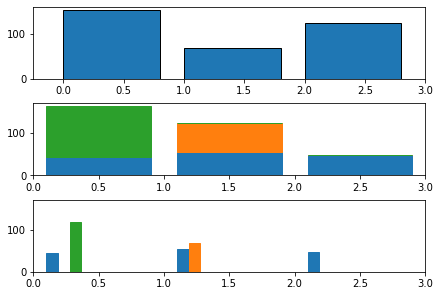

In [32]:
%matplotlib inline
import matplotlib.path as mpath
import matplotlib.patches as mpatches

fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, constrained_layout=True)
for a in artistv._paths:
    path = mpath.Path(a.vertices, a.codes, closed=True)
    patch = mpatches.PathPatch(path)
    ax1.add_patch(patch)
_ = ax1.set(ylim = (0, 160), xlim = (-0.25, 3))
for c, col in zip(artistSB.children, ['C0', 'C1', 'C2']):
    for a in c._paths:
        path = mpath.Path(a.vertices, a.codes, closed=True)
        patch = mpatches.PathPatch(path, color=col)
        ax2.add_patch(patch)
_ = ax2.set(ylim = (0, 170), xlim = (-0, 3))
for c, col in zip(artistGB.children, ['C0', 'C1', 'C2']):
    for a in c._paths:
        path = mpath.Path(a.vertices, a.codes, closed=True)
        patch = mpatches.PathPatch(path, color=col)
        ax3.add_patch(patch)
_ = ax3.set(ylim = (0, 170), xlim = (-0, 3))